Итоговая работа по курсу «Feature engineering и предобработка данных» <br>
1. Загрузить файл data_breast.csv. В данном файле собрана расчетная информация с обработанных изображений биоптата молочных желез женщин. Задача заключается в предсказании переменной “Diagnosis” - является ли содержимое биоптата доброкачественным (значение “B” – benign) либо злокачественным (значение “M” –malicious). Описание данных доступно на сайте
2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).
3. Выбрать стратегию для работы с пропущенными значениями.
4. Рассчитать и визуализировать корреляционную матрицу для переменных.
5. Визуализировать взаимосвязи между переменными (scatter plots, гистограммы, …).
6. С помощью статистических методов проверить взаимосвязи между переменными.
7. Выбрать стратегию Feature Selection – сокращение размерности либо генерация новых переменных. Какой из этих двух подходов даст лучший результат при классификации?
8. Рассчитать Feature Selection для выбранных переменных.
9. Решить задачу бинарной классификации и предсказать переменную ”Diagnosis ” протестировав как минимум 2 алгоритма. Использовать те алгоритмы, которые позволяют предсказать вероятность класса (proba). Рассчитать и вывести вероятность каждого класса.
10. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall
11. Загрузить результат в формате .ipynb ноутбука в репозиторий, ссылку добавить в личный кабинет

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_recall_fscore_support, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from scipy import stats

In [2]:
df=pd.read_csv('data_breast.csv')
df.drop(columns=['Unnamed: 32'],inplace=True)
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
dict_={'B':0,'M':1}
df.replace(dict_, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-

In [5]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df.iloc[:,1:].mode()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.0,12.34,14.93,82.61,512.2,0.1007,0.1147,0.0,0.0,0.1601,0.05667,0.2204,0.8561,1.778,16.64,0.005080,0.01104,0.0,0.0,0.01344,0.001784,12.36,17.70,101.7,284.4,0.1216,0.1486,0.0,0.0,0.2226,0.07427
1,NaN,NaN,15.70,87.76,NaN,NaN,0.1206,NaN,NaN,0.1714,0.05907,0.2860,1.1500,NaN,16.97,0.005251,0.01812,NaN,NaN,NaN,0.001892,NaN,27.26,105.9,402.8,0.1223,0.3416,NaN,NaN,0.2369,NaN
2,NaN,NaN,16.84,134.70,NaN,NaN,NaN,NaN,NaN,0.1717,0.05913,NaN,1.2680,NaN,17.67,0.005298,0.02310,NaN,NaN,NaN,0.001906,NaN,NaN,117.7,439.6,0.1234,NaN,NaN,NaN,0.2383,NaN
3,NaN,NaN,16.85,NaN,NaN,NaN,NaN,NaN,NaN,0.1769,0.06113,NaN,1.3500,NaN,18.54,0.005518,NaN,NaN,NaN,NaN,0.001956,NaN,NaN,NaN,458.0,0.1256,NaN,NaN,NaN,0.2972,NaN
4,NaN,NaN,17.46,NaN,NaN,NaN,NaN,NaN,NaN,0.1893,0.06782,NaN,NaN,NaN,NaN,0.005884,NaN,NaN,NaN,NaN,0.001971,NaN,NaN,NaN,472.4,0.1275,NaN,NaN,NaN,0.3109,NaN
5,NaN,NaN,18.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005910,NaN,NaN,NaN,NaN,0.001976,NaN,NaN,NaN,489.5,0.1312,NaN,NaN,NaN,0.3196,NaN
6,NaN,NaN,18.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005969,NaN,NaN,NaN,NaN,0.002205,NaN,NaN,NaN,546.7,0.1347,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,19.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006040,NaN,NaN,NaN,NaN,0.002256,NaN,NaN,NaN,547.4,0.1401,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,20.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006064,NaN,NaN,NaN,NaN,0.002551,NaN,NaN,NaN,624.1,0.1415,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006399,NaN,NaN,NaN,NaN,0.002665,NaN,NaN,NaN,698.8,NaN,NaN,NaN,NaN,NaN,NaN


Отсутствующих значений нет.

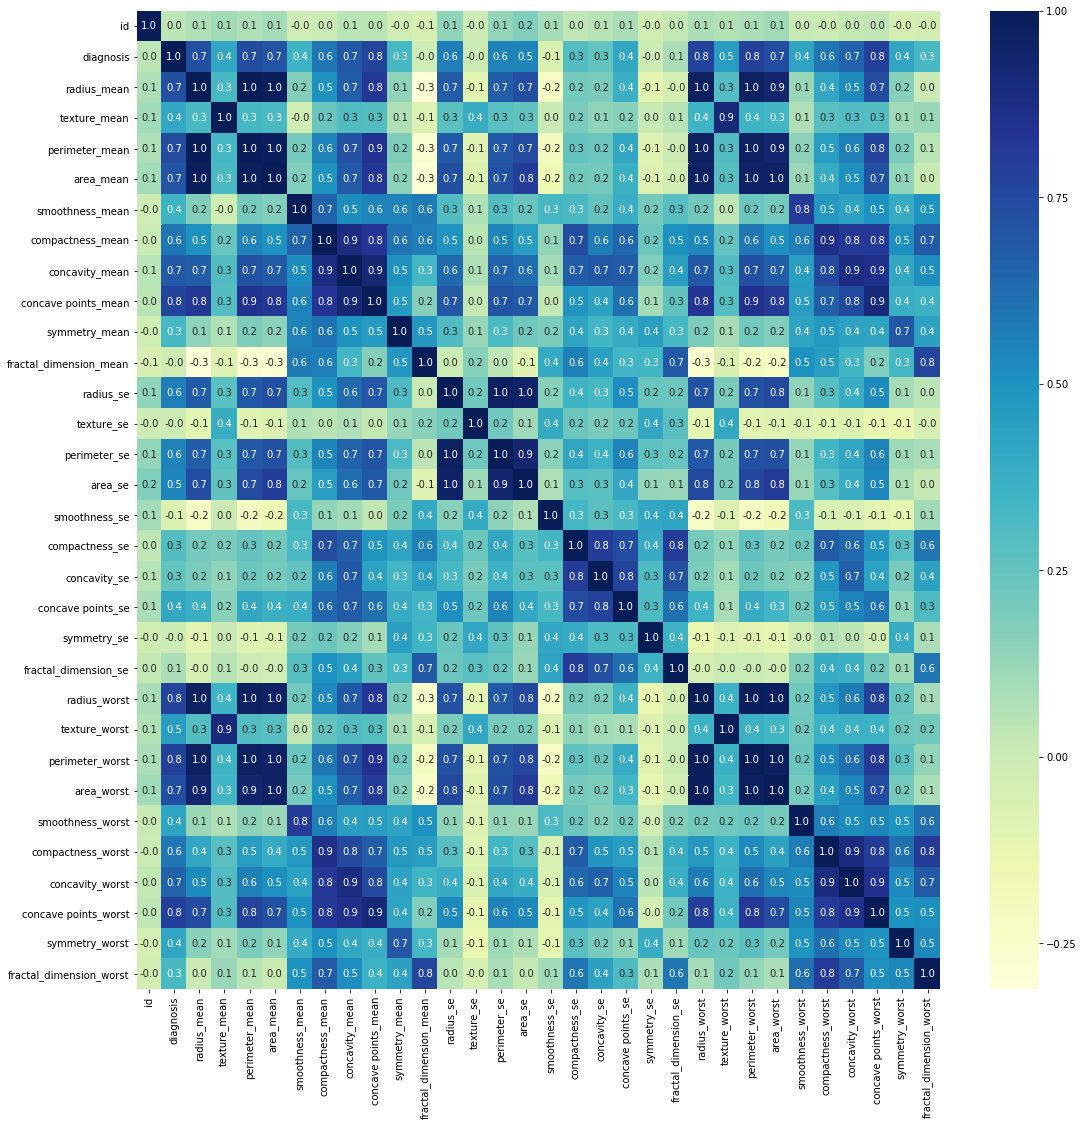

In [7]:
sns.heatmap(df.corr(),annot=True,fmt='.1f',cmap="YlGnBu",xticklabels=True, yticklabels=True)
plt.gcf().set_size_inches(18,18)

Между собой хорошо коррелируют параметры radius, perimeter, area (mean, se, worst). С диагнозом лучше всего (из указанной группы) коррелирует perimeter в состоянии worst. Т.е. Из 9 параметров можно оставить один.

Также между собой хорошо коррелируют compactness, concavity, concave points (mean, se, worst). С диагнозом лучше всего (из указанной группы) коррелирует concave points в состоянии mean или worst.

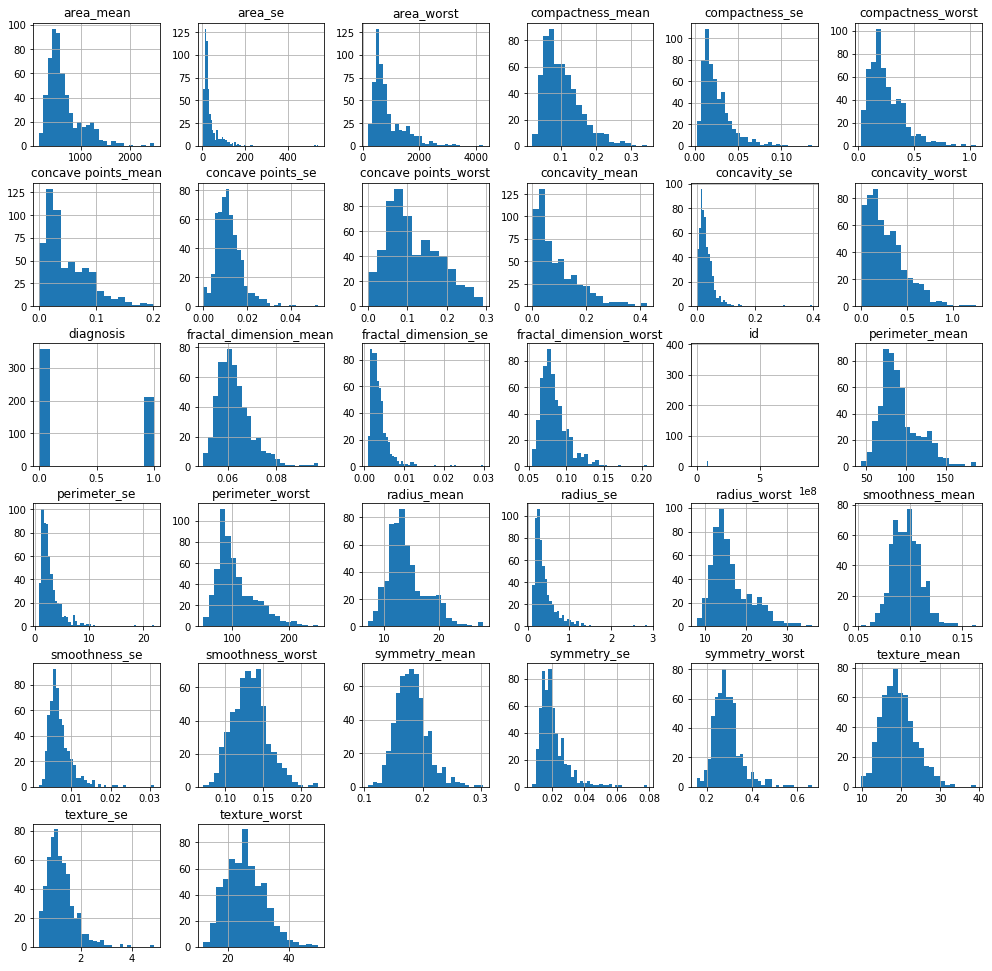

In [8]:
df.hist(figsize=(17,17),bins='auto')
plt.show()

In [9]:
clm_w=['id', 'diagnosis', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
df1=df[clm_w]
df1.head()

,id,diagnosis,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


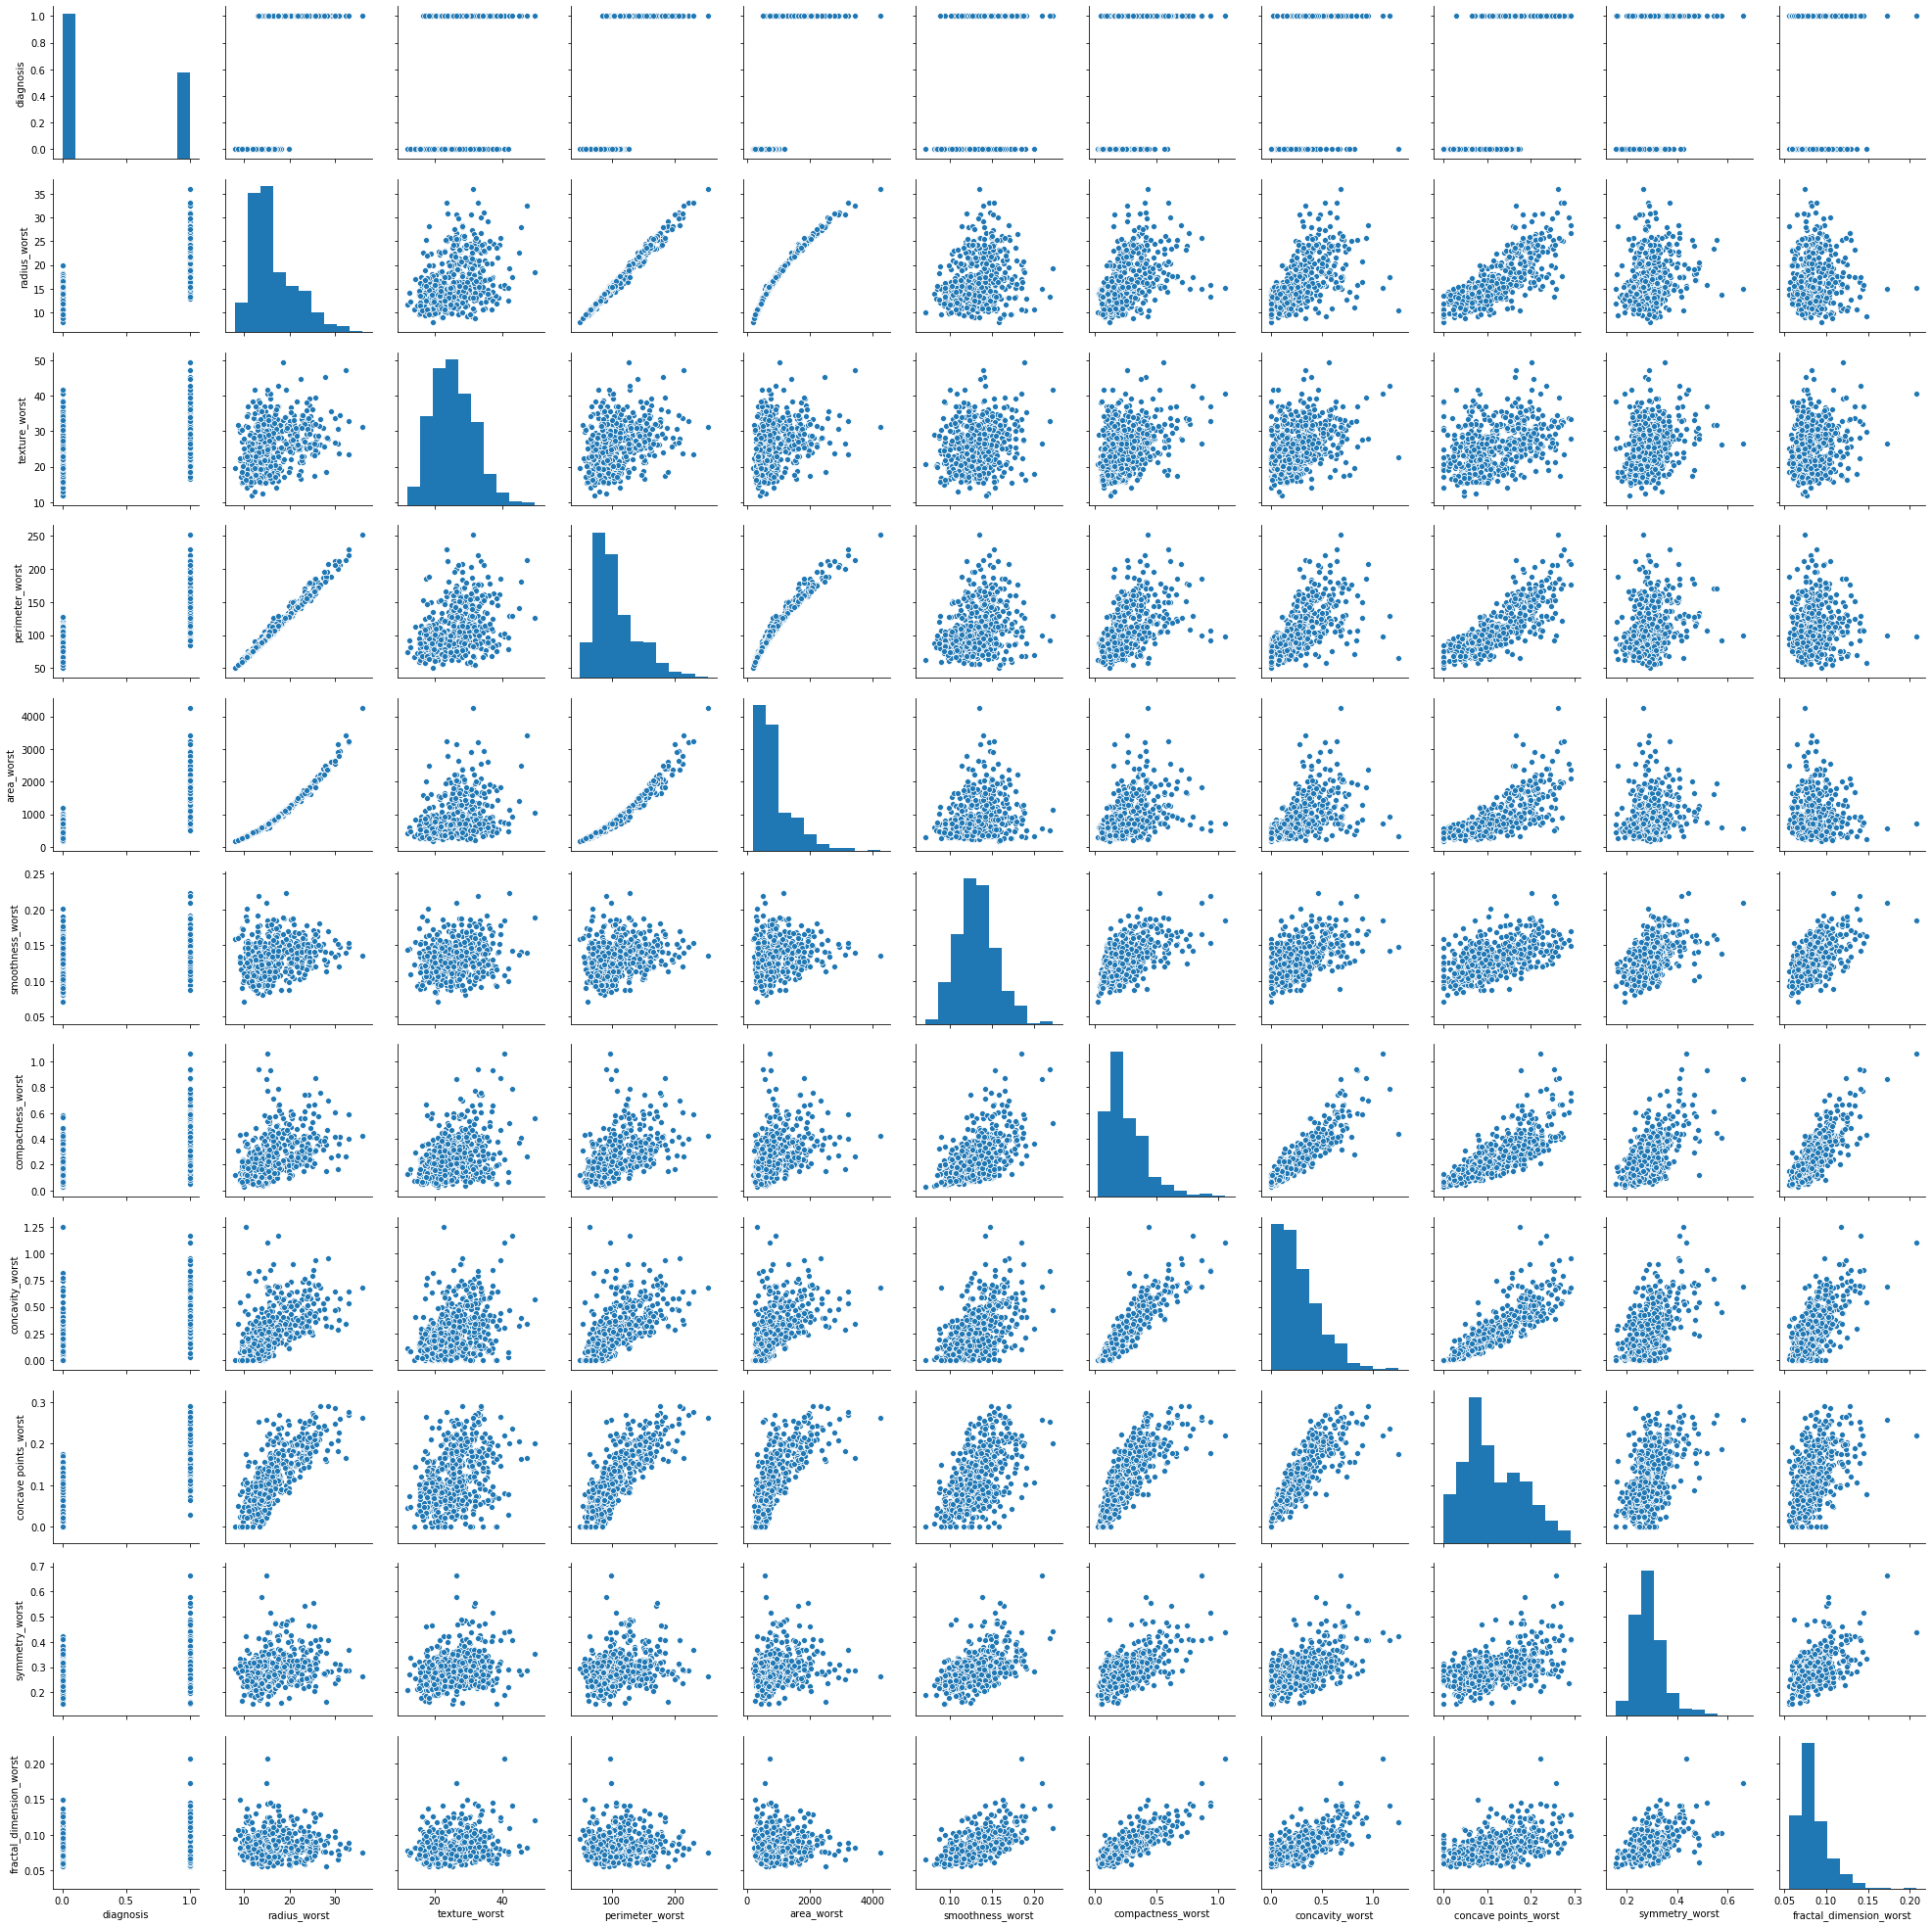

In [10]:
sns.pairplot(df1.iloc[:,1:])
plt.show()

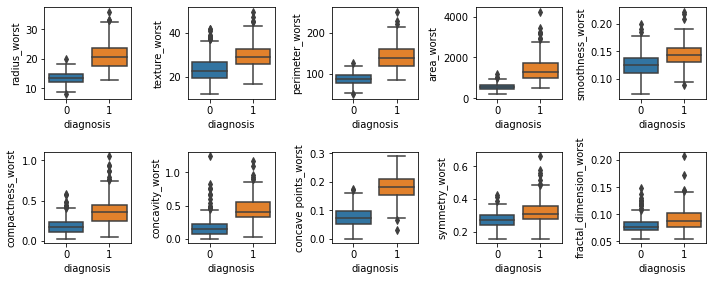

In [11]:
cor_col=['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, feat in enumerate(cor_col): 
    ax = axes[int(i/5),i%5] 
    sns.boxplot(x='diagnosis', y=feat, data=df1, ax=ax) 
    ax.set_xlabel('diagnosis') 
    ax.set_ylabel(feat) 
fig.tight_layout()

Самые большие различия имеют area и concave points.

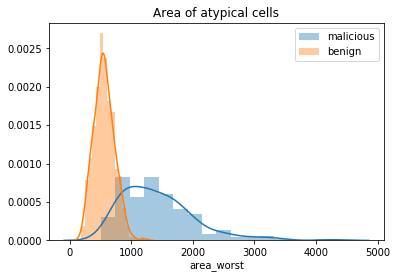

In [12]:
sns.distplot(df1[df1['diagnosis']==1]['area_worst'])
sns.distplot(df1[df1['diagnosis']==0]['area_worst'])
plt.title('Area of atypical cells')
plt.legend(['malicious', 'benign'])
plt.show()

In [13]:
stats.ttest_ind(df1[df1['diagnosis']==1]['area_worst'],
                df1[df1['diagnosis']==0]['area_worst'])

Ttest_indResult(statistic=25.721590260589004, pvalue=2.828847704286693e-97)

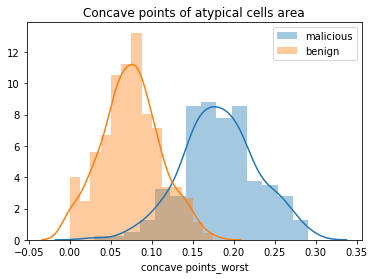

In [14]:
sns.distplot(df1[df1['diagnosis']==1]['concave points_worst'])
sns.distplot(df1[df1['diagnosis']==0]['concave points_worst'])
plt.title('Concave points of atypical cells area')
plt.legend(['malicious', 'benign'])
plt.show()

In [15]:
stats.ttest_ind(df1[df1['diagnosis']==1]['concave points_worst'],
                df1[df1['diagnosis']==0]['concave points_worst'])

Ttest_indResult(statistic=31.054555115984236, pvalue=1.9690997072164375e-124)

Проверим со всеми колонками.

In [16]:
col_all=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
df2=df[col_all]

In [17]:
y=df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.3, random_state=42)

In [18]:
lgr = LogisticRegression(random_state=0, solver='liblinear').fit(X_train, y_train)
y_train_predict = np.round(lgr.predict_proba(X_train)[:, 1],0)
print(classification_report(y_train, y_train_predict))
print('Accuracy:',accuracy_score(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       249
           1       0.95      0.92      0.94       149

    accuracy                           0.95       398
   macro avg       0.95      0.95      0.95       398
weighted avg       0.95      0.95      0.95       398

Accuracy: 0.9522613065326633


In [19]:
clf = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=0).fit(X_train, y_train)
y_train_predict = np.round(clf.predict_proba(X_train)[:, 1],0)
print(classification_report(y_train, y_train_predict))
print('Accuracy:',accuracy_score(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

Accuracy: 1.0


Попробуем уменьшенный список параметров. Даже меньше, чем в df1, так как даже в нем были коррелирующие параметры.

In [20]:
clm_l=['texture_worst',
       'area_worst', 'smoothness_worst',
       'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
df3=df[clm_l]

In [21]:
y=df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(df3, y, test_size=0.3, random_state=42)

In [22]:
lgr = LogisticRegression(random_state=0, solver='liblinear').fit(X_train, y_train)
y_train_predict = np.round(lgr.predict_proba(X_train)[:, 1],0)
print('Logistic Regression model:')
print(classification_report(y_train, y_train_predict))
print('Accuracy:',accuracy_score(y_train, y_train_predict))

Logistic Regression model:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       249
           1       0.96      0.83      0.89       149

    accuracy                           0.92       398
   macro avg       0.93      0.90      0.91       398
weighted avg       0.93      0.92      0.92       398

Accuracy: 0.9221105527638191


In [23]:
clf = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=0).fit(X_train, y_train)
y_train_predict = np.round(clf.predict_proba(X_train)[:, 1],0)
print('Random Forest Classifier model:')
print(classification_report(y_train, y_train_predict))
print('Accuracy:',accuracy_score(y_train, y_train_predict))

Random Forest Classifier model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

Accuracy: 1.0


По качеству моделей видно, что уменьшение параметров было критичным (для лог. регресси, по крайней мере).

Посмотрим, что будет, если не так сильно сокращать список в различных вариациях.

In [24]:
clm_l=['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
df3=df[clm_l]

y=df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(df3, y, test_size=0.3, random_state=42)

lgr = LogisticRegression(random_state=0, solver='liblinear').fit(X_train, y_train)
y_train_predict = np.round(lgr.predict_proba(X_train)[:, 1],0)
print('Logistic Regression model:')
print(classification_report(y_train, y_train_predict))
print('Accuracy:',accuracy_score(y_train, y_train_predict))

clf = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=0).fit(X_train, y_train)
y_train_predict = np.round(clf.predict_proba(X_train)[:, 1],0)
print('\nRandom Forest Classifier model:')
print(classification_report(y_train, y_train_predict))
print('Accuracy:',accuracy_score(y_train, y_train_predict))

Logistic Regression model:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       249
           1       0.94      0.91      0.92       149

    accuracy                           0.94       398
   macro avg       0.94      0.94      0.94       398
weighted avg       0.94      0.94      0.94       398

Accuracy: 0.9447236180904522

Random Forest Classifier model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

Accuracy: 1.0


In [25]:
clm_l=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
df3=df[clm_l]

y=df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(df3, y, test_size=0.3, random_state=42)

lgr = LogisticRegression(random_state=0, solver='liblinear').fit(X_train, y_train)
y_train_predict = np.round(lgr.predict_proba(X_train)[:, 1],0)
print('Logistic Regression model:')
print(classification_report(y_train, y_train_predict))
print('Accuracy:',accuracy_score(y_train, y_train_predict))

clf = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=0).fit(X_train, y_train)
y_train_predict = np.round(clf.predict_proba(X_train)[:, 1],0)
print('\nRandom Forest Classifier model:')
print(classification_report(y_train, y_train_predict))
print('Accuracy:',accuracy_score(y_train, y_train_predict))

Logistic Regression model:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       249
           1       0.92      0.80      0.86       149

    accuracy                           0.90       398
   macro avg       0.91      0.88      0.89       398
weighted avg       0.90      0.90      0.90       398

Accuracy: 0.8994974874371859

Random Forest Classifier model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

Accuracy: 1.0


Модели имеют лучшее качество со всеми параметрами (из указанных вариантов комбинаций).